## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [81]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
sns.set_theme(style="darkgrid")

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [11]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '../input/cats-and-dogs/Cats_and_Dogs/train'
val =   '../input/cats-and-dogs/Cats_and_Dogs/val'
test =  '../input/cats-and-dogs/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [12]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [30]:
def get_sequental_model():
    model = Sequential()

    # 1: +Convolutional
    # For example:
    model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
    model.add(Activation('relu'))

    # 2: +Pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 3:
    model.add(Conv2D(32, (3, 3)))
    #     +Relu
    model.add(Activation('relu'))

    # 4:  +Pooling 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 5:  +Convolutional
    model.add(Conv2D(64, (3, 3)))
    #     +Relu
    model.add(Activation('relu'))

    # 6:  +Pooling 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 7:  +Flattening
    model.add(Flatten())
    # 8:  +Dense
    model.add(Dense(64))
    #     +ReLu
    model.add(Activation('relu'))
    # 9:  +Dropout
    model.add(Dropout(0.5))
    # 10: +Dense
    model.add(Dense(1))
    #     +Sigmoid
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [31]:
model = get_sequental_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [34]:
model = get_sequental_model()
model_10 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Epoch 1/10
312/312 [==============================] - 70s 222ms/step - loss: 0.5903 - accuracy: 0.6718 - val_loss: 0.5160 - val_accuracy: 0.7533
Epoch 2/10
312/312 [==============================] - 69s 220ms/step - loss: 0.4931 - accuracy: 0.7625 - val_loss: 0.4531 - val_accuracy: 0.7796
Epoch 3/10
312/312 [==============================] - 68s 218ms/step - loss: 0.4341 - accuracy: 0.8032 - val_loss: 0.4168 - val_accuracy: 0.8125
Epoch 4/10
312/312 [==============================] - 68s 217ms/step - loss: 0.3764 - accuracy: 0.8317 - val_loss: 0.3778 - val_accuracy: 0.8294
Epoch 5/10
312/312 [==============================] - 67s 215ms/step - loss: 0.3306 - accuracy: 0.8592 - val_loss: 0.3689 - val_accuracy: 0.8392
Epoch 6/10
312/312 [==============================] - 68s 218ms/step - loss: 0.2924 - accuracy: 0.8754 - val_loss: 0.3726 - val_accuracy: 0.8376
Epoch 7/10
312/312 [==============================] - 67s 216ms/step - loss: 0.2504 - accuracy: 0.8972 - val_loss: 0.3981 - val_ac

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 85.18%


In [35]:
model = get_sequental_model()
model_15 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Epoch 1/15
312/312 [==============================] - 69s 219ms/step - loss: 0.6160 - accuracy: 0.6572 - val_loss: 0.5346 - val_accuracy: 0.7418
Epoch 2/15
312/312 [==============================] - 68s 218ms/step - loss: 0.5053 - accuracy: 0.7576 - val_loss: 0.4491 - val_accuracy: 0.7981
Epoch 3/15
312/312 [==============================] - 68s 217ms/step - loss: 0.4439 - accuracy: 0.7997 - val_loss: 0.4160 - val_accuracy: 0.8096
Epoch 4/15
312/312 [==============================] - 68s 218ms/step - loss: 0.3971 - accuracy: 0.8251 - val_loss: 0.4053 - val_accuracy: 0.8199
Epoch 5/15
312/312 [==============================] - 68s 216ms/step - loss: 0.3547 - accuracy: 0.8456 - val_loss: 0.3900 - val_accuracy: 0.8335
Epoch 6/15
312/312 [==============================] - 68s 217ms/step - loss: 0.3177 - accuracy: 0.8629 - val_loss: 0.3777 - val_accuracy: 0.8384
Epoch 7/15
312/312 [==============================] - 68s 219ms/step - loss: 0.2894 - accuracy: 0.8779 - val_loss: 0.3782 - val_ac

In [36]:
model = get_sequental_model()
model_20 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Epoch 1/20
312/312 [==============================] - 69s 219ms/step - loss: 0.6282 - accuracy: 0.6320 - val_loss: 0.5266 - val_accuracy: 0.7451
Epoch 2/20
312/312 [==============================] - 68s 217ms/step - loss: 0.5257 - accuracy: 0.7446 - val_loss: 0.5025 - val_accuracy: 0.7718
Epoch 3/20
312/312 [==============================] - 69s 220ms/step - loss: 0.4585 - accuracy: 0.7854 - val_loss: 0.4312 - val_accuracy: 0.8076
Epoch 4/20
312/312 [==============================] - 68s 219ms/step - loss: 0.4129 - accuracy: 0.8116 - val_loss: 0.4207 - val_accuracy: 0.8063
Epoch 5/20
312/312 [==============================] - 67s 216ms/step - loss: 0.3662 - accuracy: 0.8388 - val_loss: 0.3968 - val_accuracy: 0.8265
Epoch 6/20
312/312 [==============================] - 68s 217ms/step - loss: 0.3302 - accuracy: 0.8604 - val_loss: 0.3848 - val_accuracy: 0.8244
Epoch 7/20
312/312 [==============================] - 67s 216ms/step - loss: 0.2859 - accuracy: 0.8808 - val_loss: 0.3808 - val_ac

Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [67]:
models = {
    "cnn_10": model_10.history,
    "cnn_15": model_15.history,
    "cnn_20": model_20.history,
}
keys = ["accuracy", "loss"]

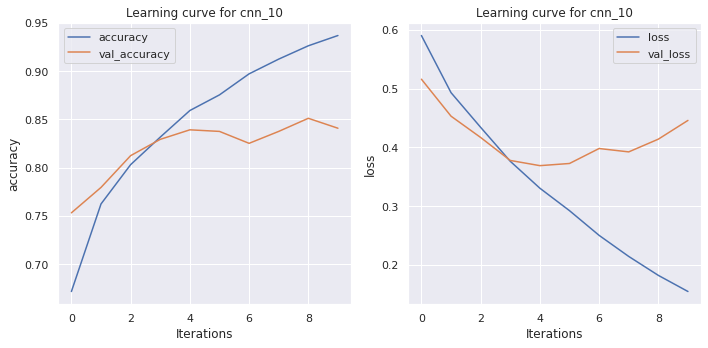

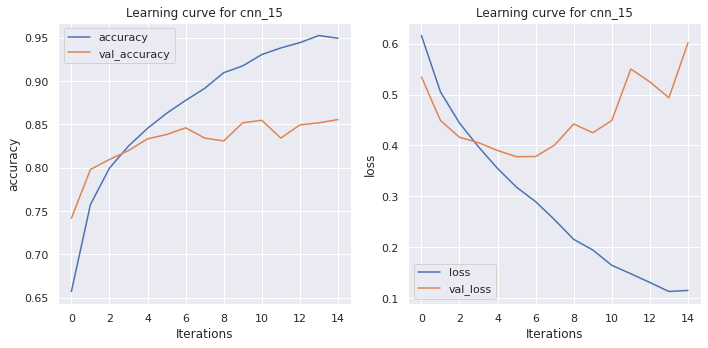

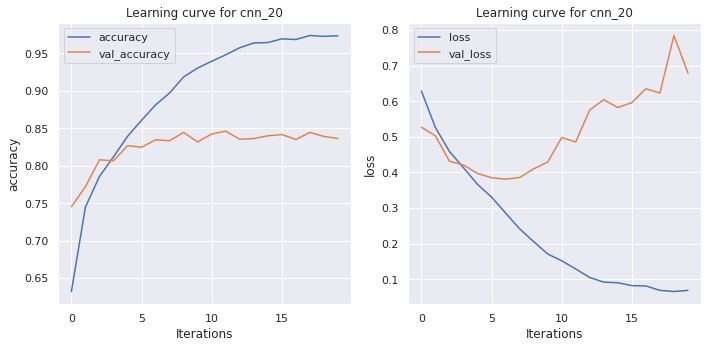

In [70]:
def plot_curves(models, keys):
    for model_name in models.keys():
        fig, ax = plt.subplots(1, len(keys))
        fig.set_size_inches(10, 10/len(keys))
        i = 0
        for metric_name in keys:
            
            all_metrics = models[model_name].keys()
            metrics = [m for m in all_metrics if metric_name in m]
            metric_values = models[model_name][metric_name]
            for m in metrics:
                ax[i].plot(np.arange(0, len(models[model_name][m]), 1), models[model_name][m], label=m)

            ax[i].legend()
            ax[i].set_title(f"Learning curve for {model_name}")
            ax[i].set_ylabel(metric_name)
            ax[i].set_xlabel("Iterations")
            i += 1

        fig.tight_layout()    
        plt.show()

plot_curves(models, keys)

As we can see from the curves, after 6-7 iterations there is no significant increase in accuracy and there is an increase in losses, which means that subsequent training does not make sense and is overfitting.

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [73]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [105]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))    

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
activation_29 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_30 (Activation)   (None, 1)                

In [106]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [107]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

vgg_16_10 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
312/312 [==============================] - 78s 249ms/step - loss: 0.4996 - accuracy: 0.7468 - val_loss: 0.3508 - val_accuracy: 0.8528
Epoch 2/10
312/312 [==============================] - 78s 249ms/step - loss: 0.3407 - accuracy: 0.8519 - val_loss: 0.2946 - val_accuracy: 0.8849
Epoch 3/10
312/312 [==============================] - 77s 247ms/step - loss: 0.2990 - accuracy: 0.8734 - val_loss: 0.2718 - val_accuracy: 0.8927
Epoch 4/10
312/312 [==============================] - 74s 238ms/step - loss: 0.2727 - accuracy: 0.8846 - val_loss: 0.2553 - val_accuracy: 0.9005
Epoch 5/10
312/312 [==============================] - 74s 237ms/step - loss: 0.2602 - accuracy: 0.8886 - val_loss: 0.2476 - val_accuracy: 0.9058
Epoch 6/10
312/312 [==============================] - 74s 237ms/step - loss: 0.2476 - accuracy: 0.8955 - val_loss: 0.2403 - val_accuracy: 0.9104
Epoch 7/10
312/312 [==============================] - 78s 250ms/step - loss: 0.2380 - accuracy: 0.9012 - val_loss: 0.2355 - val_ac

In [108]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 89.98%


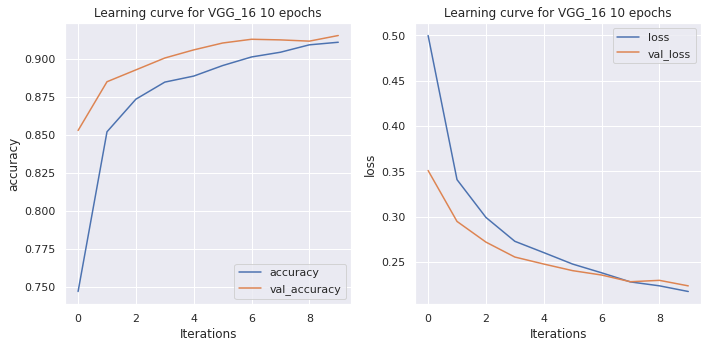

In [109]:
models = {
   "VGG_16 10 epochs": vgg_16_10.history
}
plot_curves(models, keys)

VGG 16 shows an increase in accuracy and a decrease in power loss up to epoch 10, in contrast to CNN. The accuracy on the test dataset is much higher.

In [82]:
# First, download the weights of the ResNet50 network trained on the ImageNet dataset:

resnet50 = ResNet50(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
resnet50.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

resnet50.summary()                       # pay attention to the number of trained and untrained parameters

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [83]:
# add layers to ResNet50:

model = Sequential()
model.add(resnet50)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))    

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               13107456  
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
_________________________________________________________________
activation_28 (Activation)   (None, 1)                

In [84]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [85]:
resnet50_10 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
312/312 [==============================] - 77s 237ms/step - loss: 0.6876 - accuracy: 0.5654 - val_loss: 0.6497 - val_accuracy: 0.6345
Epoch 2/10
312/312 [==============================] - 73s 234ms/step - loss: 0.6522 - accuracy: 0.6158 - val_loss: 0.6347 - val_accuracy: 0.6517
Epoch 3/10
312/312 [==============================] - 73s 233ms/step - loss: 0.6368 - accuracy: 0.6398 - val_loss: 0.6208 - val_accuracy: 0.6674
Epoch 4/10
312/312 [==============================] - 74s 237ms/step - loss: 0.6241 - accuracy: 0.6545 - val_loss: 0.6165 - val_accuracy: 0.6624
Epoch 5/10
312/312 [==============================] - 73s 234ms/step - loss: 0.6162 - accuracy: 0.6648 - val_loss: 0.6051 - val_accuracy: 0.6846
Epoch 6/10
312/312 [==============================] - 73s 234ms/step - loss: 0.6088 - accuracy: 0.6740 - val_loss: 0.5997 - val_accuracy: 0.6883
Epoch 7/10
312/312 [==============================] - 74s 237ms/step - loss: 0.6029 - accuracy: 0.6801 - val_loss: 0.5928 - val_ac

In [86]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy on test data: 69.91%


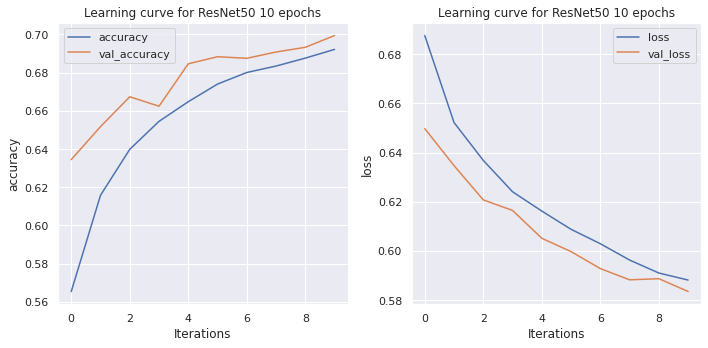

In [87]:
models = {
   "ResNet50 10 epochs": resnet50_10.history
}
plot_curves(models, keys)

The ResNet50 model shows the worst result of all in terms of accuracy on the test dataset, however, the accuracy continues to grow and we can talk about underfitting. However, the accuracy of previous models in the first epochs was immediately much greater.